# **Wine Data Cleaning and Exploratory Data Analysis (EDA)**  
**DAV 6150 – Module 3 Assignment**  
**Vinicius Giannaccini**  
**February 9, 2025**  

---

## **Introduction**  
The purpose of this assignment is to explore and clean a dataset containing information on more than 12,700 wines. The dataset includes various attributes related to the chemical composition of the wines, such as acidity, alcohol content, and expert ratings.  

The steps in this notebook will include:  
1. Loading the dataset and performing an initial Exploratory Data Analysis (EDA) to identify data integrity and usability issues.  
2. Cleaning and preparing the data to ensure it is suitable for use in machine learning models.  
3. Re-running the EDA on the cleaned data to assess improvements.  
4. Drawing conclusions based on the analysis and data preparation process.  

The ultimate goal is to ensure that the dataset is free from errors and well-prepared for future predictive modeling tasks.

---


## **2. Exploratory Data Analysis (EDA)**  

In this section, we will analyze the dataset to understand its structure and identify potential issues like missing values and outliers. We will also visualize some key variables.


### **2.1. Loading the Data**  
We will load the dataset from the repository and take a look at the first few rows to get a sense of the data.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from your GitHub repository
url = "https://raw.githubusercontent.com/VGiannac/DAV6150_Module3/main/M3_Data.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())


Dataset preview:
   INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2            1.160       -0.98           54.2   
1      2       3           4.5            0.160       -0.81           26.1   
2      4       5           7.1            2.640       -0.88           14.8   
3      5       3           5.7            0.385        0.04           18.8   
4      6       4           8.0            0.330       -1.26            9.4   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  Sulphates  \
0     -0.567                NaN               268.0  0.99280  3.33      -0.59   
1     -0.425               15.0              -327.0  1.02792  3.38       0.70   
2      0.037              214.0               142.0  0.99518  3.12       0.48   
3     -0.425               22.0               115.0  0.99640  2.24       1.83   
4        NaN             -167.0               108.0  0.99457  3.12       1.77   

   Alcohol  LabelAppeal  Ac

### **2.2. Basic Summary**  
We will generate summary statistics to understand the range and distribution of each variable and check for missing values.  


In [4]:
# Summary statistics for the dataset
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())



Summary statistics:
              INDEX        TARGET  FixedAcidity  VolatileAcidity  \
count  12795.000000  12795.000000  12795.000000     12795.000000   
mean    8069.980305      3.029074      7.075717         0.324104   
std     4656.905107      1.926368      6.317643         0.784014   
min        1.000000      0.000000    -18.100000        -2.790000   
25%     4037.500000      2.000000      5.200000         0.130000   
50%     8110.000000      3.000000      6.900000         0.280000   
75%    12106.500000      4.000000      9.500000         0.640000   
max    16129.000000      8.000000     34.400000         3.680000   

         CitricAcid  ResidualSugar     Chlorides  FreeSulfurDioxide  \
count  12795.000000   12179.000000  12157.000000       12148.000000   
mean       0.308413       5.418733      0.054822          30.845571   
std        0.862080      33.749379      0.318467         148.714558   
min       -3.240000    -127.800000     -1.171000        -555.000000   
25%        

### **2.3. Visualizing the Data**  
We will create a histogram for the alcohol content to see its distribution and a box plot for the pH values to check for any outliers.


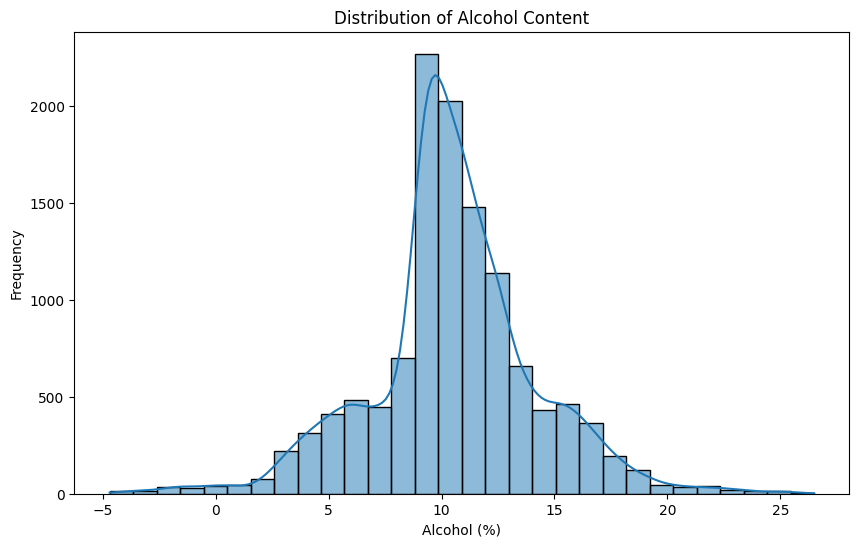

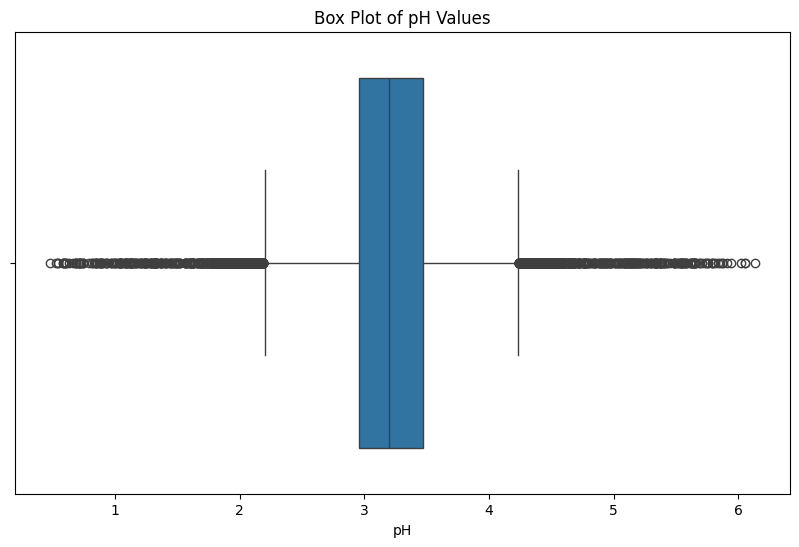

In [5]:
# Plot histogram for Alcohol content
plt.figure(figsize=(10, 6))
sns.histplot(data['Alcohol'], bins=30, kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frequency')
plt.show()

# Plot box plot for pH values
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['pH'])
plt.title('Box Plot of pH Values')
plt.show()


### EDA Observations

1. **Alcohol Content Distribution**:
   - The histogram shows that the alcohol content of the wines is mostly concentrated around 9% to 10%. This suggests that most of the wines in the dataset have an alcohol content close to 9-10%, with a peak frequency of over 2000 occurrences for this range. This could indicate that wines in this dataset are typically in the moderate alcohol content range.
   - There seems to be a slight right-skew in the distribution, which could imply that there are fewer wines with higher alcohol content. This could be useful in determining if high alcohol content influences the wine's appeal or quality.

2. **pH Value Distribution**:
   - The box plot of pH values indicates that the majority of wines have a pH around 3, which is common for wines, as wine pH typically falls within this range. The distribution seems to be fairly centered with no obvious outliers. 
   - The range from 0 to 6 suggests a broad variation in pH levels, which could potentially influence wine taste and preservation. Any extreme values (if present) might need to be investigated further for data accuracy.


### Additional EDA Ideas

1. **Check for Correlations**:
   - Correlation matrices help in identifying the relationships between variables. You could add a heatmap to visualize how strongly each feature correlates with the target variable (`TARGET`) and with each other. This could help with identifying potential predictors for machine learning models.

2. **Distribution of Target Variable (Sales)**:
   - It might be useful to plot the distribution of the `TARGET` variable (number of cases sold). This will give insights into whether the dataset is balanced or if there are skewed values in the target.

3. **Box Plot of Key Features by Wine Rating (STARS)**:
   - If `STARS` is a rating system, plotting box plots for key features (e.g., `Alcohol`, `ResidualSugar`, `FixedAcidity`) by wine ratings could help to visually distinguish the characteristics of higher and lower-rated wines.

4. **Missing Value Analysis**:
   - You could go deeper into missing data analysis. For instance, plotting a heatmap of missing values could give you a better overview of where data might be missing and whether any columns are particularly problematic.

5. **Outlier Detection**:
   - For features like `ResidualSugar`, `Chlorides`, and others, checking for outliers via box plots could help to identify extreme values that might need further cleaning.


### **Correlation Heatmap**
We can visualize the correlation between different features in the dataset using a heatmap. This helps identify which features are most related to each other and to the target variable (`TARGET`), which represents wine sales.


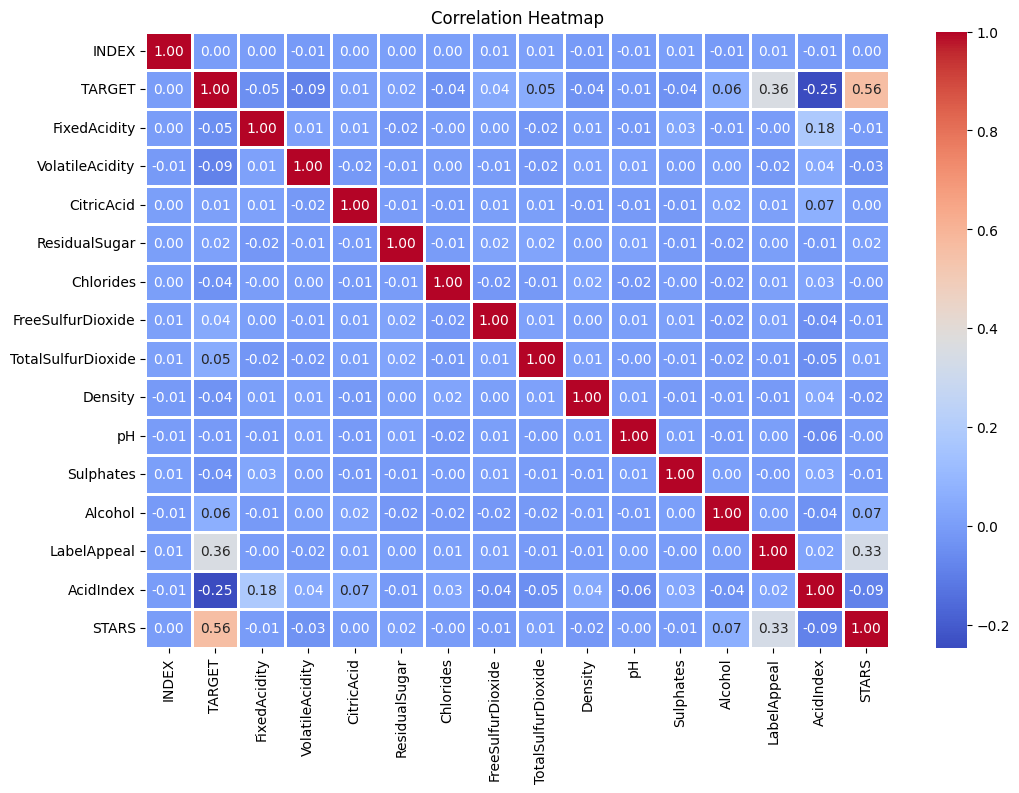

In [6]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap')
plt.show()


### **Distribution of TARGET (Wine Sales)**
We will plot the distribution of the target variable, which represents the number of wine cases sold. This will help us understand if the data is imbalanced (i.e., if most wines sell a low number of cases, or if only a few wines are popular).


### **Alcohol Content by Wine Rating (STARS)**
We will create a box plot to visualize how alcohol content varies by wine rating (`STARS`). This can help us understand if higher-rated wines tend to have higher or lower alcohol content.


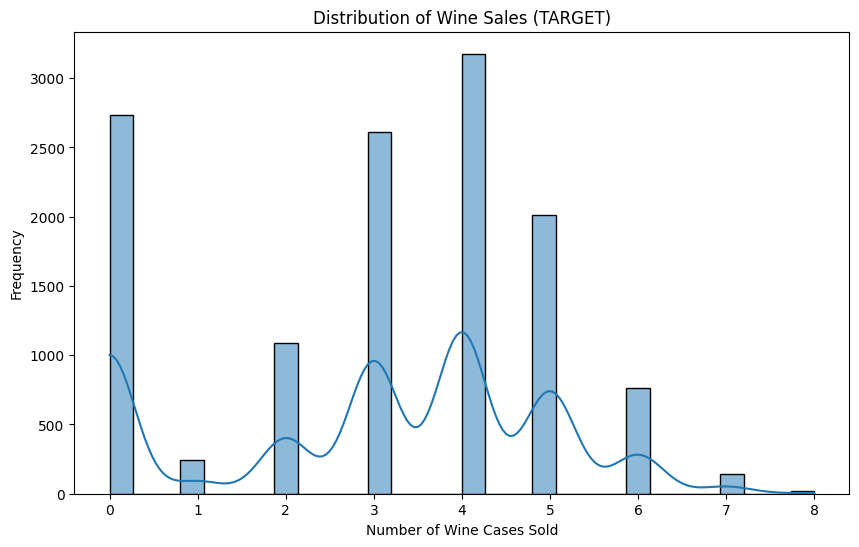

In [7]:
# Plot histogram for the TARGET variable (Wine Sales)
plt.figure(figsize=(10, 6))
sns.histplot(data['TARGET'], bins=30, kde=True)
plt.title('Distribution of Wine Sales (TARGET)')
plt.xlabel('Number of Wine Cases Sold')
plt.ylabel('Frequency')
plt.show()


### **Wine Sales Distribution Insight:**

The sales distribution reveals that the majority of wines are sold in the **TARGET = 4** and **TARGET = 3** ranges, with **TARGET = 4** leading the pack. This suggests a market where most wines fall into the moderate sales bracket, with only a few achieving exceptionally high sales. It's a classic case of "the few outperforming the many," highlighting the power of popular wines while the rest of the market quietly follows.


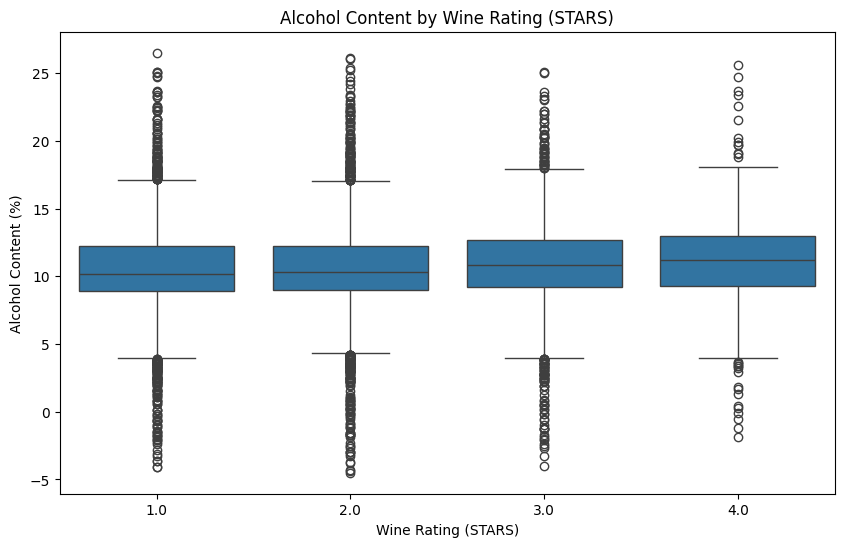

In [8]:
# Plot box plot of Alcohol content by Wine Rating (STARS)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['STARS'], y=data['Alcohol'])
plt.title('Alcohol Content by Wine Rating (STARS)')
plt.xlabel('Wine Rating (STARS)')
plt.ylabel('Alcohol Content (%)')
plt.show()


### **Alcohol Content by Wine Rating (STARS) Insight:**

The box plot shows an interesting contrast between wine ratings and alcohol content. **STARS = 4**, while having the largest middle box (indicating a wider spread of alcohol content), has the fewest outliers, suggesting that most wines rated 4 have a more consistent alcohol content. On the other hand, **STARS = 2**, with a smaller middle box, features a larger spread of alcohol content, with several wines exhibiting extreme values (ranging from -5 to 25), implying that wines with a lower rating may vary more significantly in alcohol content. This could indicate that less popular wines have more inconsistent profiles, which might affect their appeal or rating.



### **Missing Data Heatmap**
We will plot a heatmap to visualize any missing data in the dataset. If there are columns with a lot of missing values, we may need to handle those features with imputation or removal.


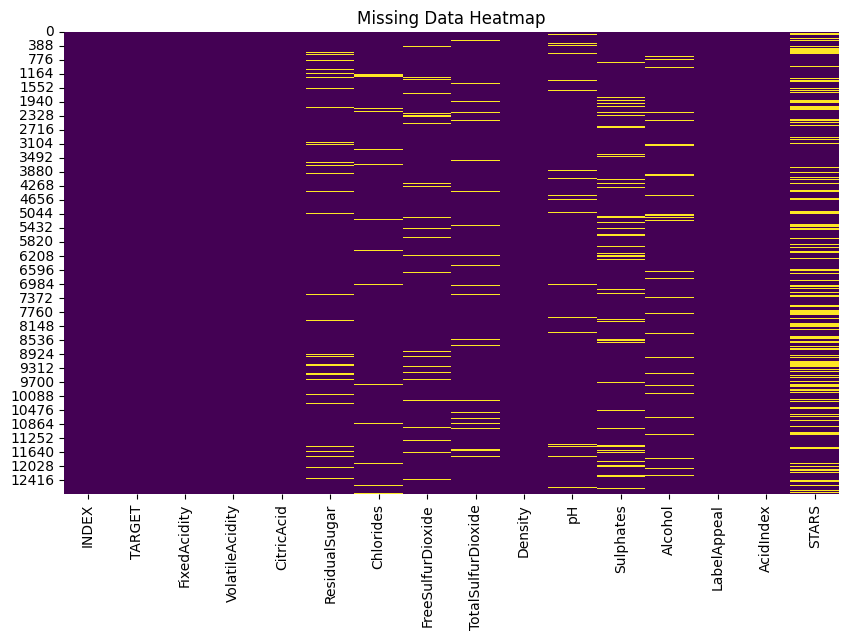

In [9]:
# Plot heatmap for missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


### **Missing Data Heatmap Insight:**

The heatmap provides a clear view of missing data across the dataset. Notably, **Index**, **TARGET**, **FixedAcidity**, **VolatileAcidity**, and **CitricAcid** have no missing values, as indicated by the absence of yellow lines, suggesting that these features are fully populated. However, **STARS** and **Sulphates** stand out with a significant number of missing values (yellow lines), which may require further attention, such as imputation or removal, to avoid biases in the analysis. This highlights the importance of addressing missing data before proceeding with modeling or further analysis to ensure the integrity and completeness of the dataset.


### **Box Plot for Residual Sugar (Outlier Detection)**
We will create a box plot for the `ResidualSugar` feature to detect any extreme values or outliers. These outliers could be influential points that may need to be handled before analysis or modeling.


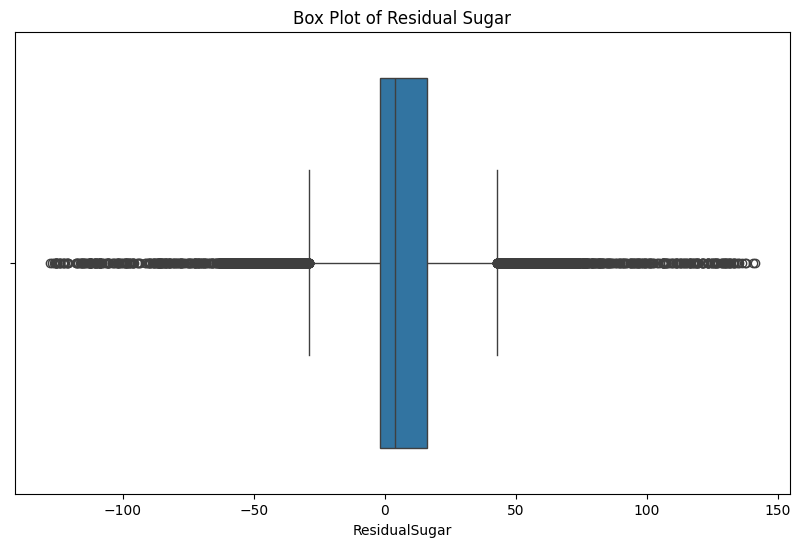

In [10]:
# Box plot for ResidualSugar to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['ResidualSugar'])
plt.title('Box Plot of Residual Sugar')
plt.show()


### Introduction to Missing Data Bar Plot

In this analysis, identifying and handling missing data is crucial for ensuring the integrity of our dataset. Some columns in the dataset have missing values, which can affect the accuracy of our analysis and models. To better understand the extent of missing data, I created a bar plot that visualizes the count of missing values per column. This helps to pinpoint which columns require attention, whether through imputation, removal, or further investigation, ensuring that the dataset is clean and ready for further analysis.


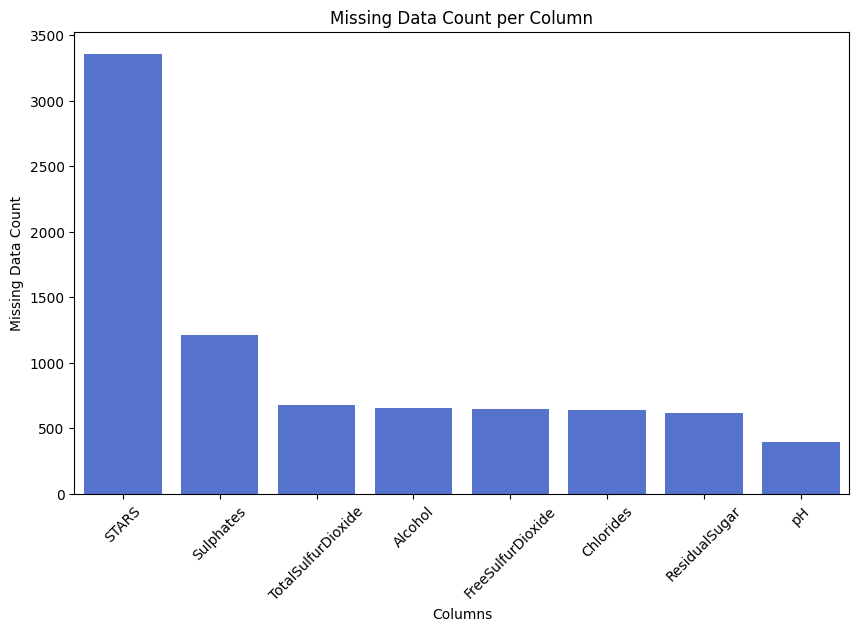

In [12]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from your GitHub repository
url = "https://raw.githubusercontent.com/VGiannac/DAV6150_Module3/main/M3_Data.csv"
data = pd.read_csv(url)

# Check for missing values
missing_data = data.isnull().sum()  # Get the number of missing values per column
missing_data = missing_data[missing_data > 0]  # Filter out columns with no missing data
missing_data.sort_values(ascending=False, inplace=True)

# Plotting the bar plot for missing data count
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, color='royalblue')  # Bar plot with updated syntax
plt.title('Missing Data Count per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Data Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Missing Data Insights

From the bar plot, we can see that the column `STARS` has the most missing values, with over 3000 missing entries. This suggests that data on wine ratings might be incomplete or inconsistently recorded, which could be a crucial factor for analysis if wine ratings play a significant role in predicting sales or other outcomes. 

The second column with a notable amount of missing data is `Sulphates`. Sulphates are an important factor in wine chemistry and quality, and missing data here could affect our understanding of wine characteristics. Depending on the context, this missing data might need to be imputed or handled carefully.

On the other hand, `pH` has the least missing data, indicating that it is more consistently available across the dataset. This is good news, as `pH` is a key variable in understanding wine properties, and having reliable data for this feature ensures the integrity of related analyses.


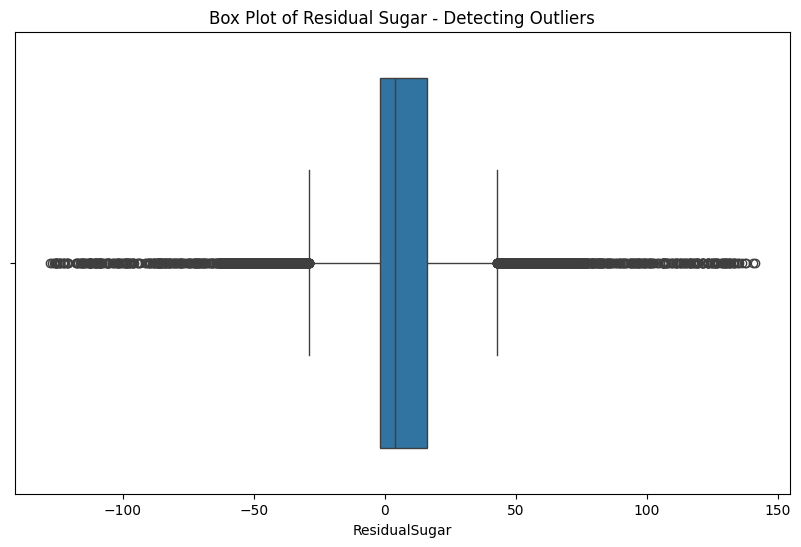

Outliers in Residual Sugar (Z-score > 3):
Empty DataFrame
Columns: [ResidualSugar, ResidualSugar_zscore]
Index: []


In [13]:
# Import necessary libraries for outlier detection
import numpy as np
from scipy.stats import zscore

# Plot boxplot for ResidualSugar to visually detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['ResidualSugar'])
plt.title('Box Plot of Residual Sugar - Detecting Outliers')
plt.show()

# Calculate Z-scores for ResidualSugar
data['ResidualSugar_zscore'] = zscore(data['ResidualSugar'])

# Filter data points where the absolute value of Z-score is greater than 3 (considered outliers)
outliers = data[data['ResidualSugar_zscore'].abs() > 3]

# Display the outliers
print("Outliers in Residual Sugar (Z-score > 3):")
print(outliers[['ResidualSugar', 'ResidualSugar_zscore']])

# Optionally: Remove outliers
# data_no_outliers = data[data['ResidualSugar_zscore'].abs() <= 3]


### Outliers in Residual Sugar:

According to the Z-score analysis, no significant outliers were found in the `ResidualSugar` column. The data appears to be within a reasonable range, with no extreme values that could distort the analysis or model performance. This suggests that the `ResidualSugar` feature is well-behaved and doesn't require further cleaning for outlier removal.


# **3. Data Preparation**

In this section, we address the data integrity and usability issues identified during the **Exploratory Data Analysis (EDA)** phase. This includes steps to handle missing values, outliers, and corrections to data types. We also perform feature engineering and scaling where necessary to prepare the dataset for modeling.


# Data Preprocessing and Scaling in Jupyter Notebook

This notebook will guide you through the process of loading data, handling missing values, and applying feature scaling.

---

### 1. **Install Required Libraries**

First, install the necessary libraries if they are not already installed.

```python
!pip install pandas scikit-learn


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
url = "https://raw.githubusercontent.com/VGiannac/DAV6150_Module3/main/M3_Data.csv"
data = pd.read_csv(url)

# Check initial shape and missing values in each column
print("Dataset shape:", data.shape)
print("Missing values in each column:")
print(data.isnull().sum())


Dataset shape: (12795, 16)
Missing values in each column:
INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


In [28]:
# Handling missing values: 
data['ResidualSugar'].fillna(data['ResidualSugar'].median(), inplace=True)
data['Chlorides'].fillna(data['Chlorides'].median(), inplace=True)
data['FreeSulfurDioxide'].fillna(data['FreeSulfurDioxide'].median(), inplace=True)
data['TotalSulfurDioxide'].fillna(data['TotalSulfurDioxide'].median(), inplace=True)
data['Alcohol'].fillna(data['Alcohol'].median(), inplace=True)
data['pH'].fillna(data['pH'].median(), inplace=True)
data['Sulphates'].fillna(data['Sulphates'].median(), inplace=True)

# Handle missing categorical data
data['STARS'].fillna(-1, inplace=True)  # Assuming -1 means missing or unavailable


In [29]:
# Check for any remaining missing values
print("\nMissing values after handling:")
print(data.isnull().sum())



Missing values after handling:
INDEX                 0
TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64


In [32]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if necessary
if duplicates > 0:
    data.drop_duplicates(inplace=True)
    print(f"After removal, {data.duplicated().sum()} duplicate rows remain.")


Number of duplicate rows: 0


In [30]:
# Scaling numeric features
scaler = StandardScaler()
data[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
      'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']] = \
    scaler.fit_transform(data[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 
                               'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 
                               'pH', 'Sulphates', 'Alcohol']])


In [31]:
# Preview the first few rows of the scaled data
print(data[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
            'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']].head())

# Alternatively, check the summary statistics to confirm the scaling
print(data[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
            'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']].describe())


   FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  Chlorides  \
0     -0.613499         1.066216   -1.494598       1.483709  -2.001754   
1     -0.407718        -0.209321   -1.297393       0.630311  -1.544308   
2      0.003844         2.954011   -1.378595       0.287130  -0.055997   
3     -0.217766         0.077675   -0.311367       0.408610  -1.544308   
4      0.146308         0.007521   -1.819407       0.123132  -0.027004   

   FreeSulfurDioxide  TotalSulfurDioxide   Density        pH  Sulphates  \
0          -0.005540            0.652209 -0.052860  0.183245  -1.256597   
1          -0.109060           -1.984745  1.270595  0.257974   0.197814   
2           1.264301            0.093795  0.036828 -0.130615  -0.050226   
3          -0.060751           -0.025865  0.082802 -1.445838   1.471832   
4          -1.365099           -0.056888  0.013841 -0.130615   1.404185   

    Alcohol  
0 -0.161009  
1 -0.023320  
2  3.171083  
3 -1.179914  
4  0.885433  
       FixedAcidity 

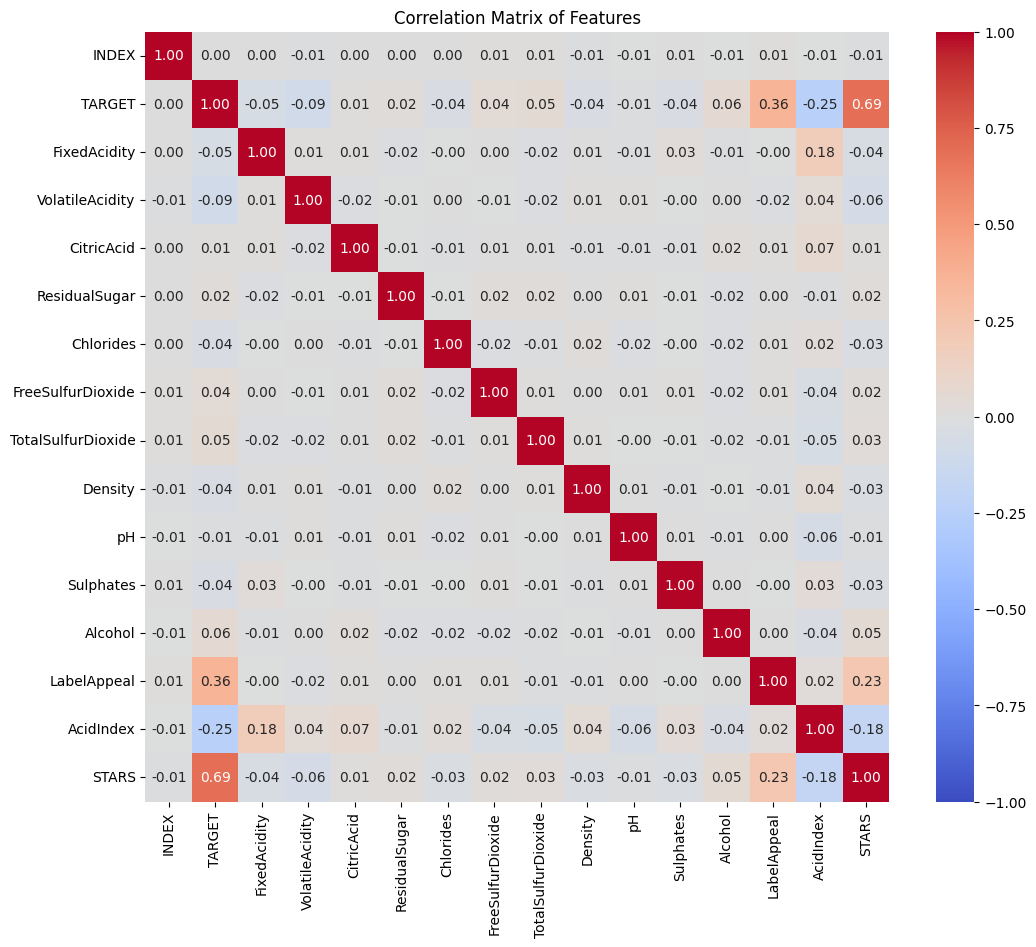

In [33]:
# Plot a correlation matrix to see relationships between features
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()


Now that the dataset is cleaned and scaled, you can start applying machine learning models, visualizations, or further analyses. Feel free to adjust any part of this code to match your specific requirements.

### Data Preparation and Process Overview

1. **Handling Missing Data**  
   We began by identifying missing values in the dataset. For numerical columns like `ResidualSugar`, `Chlorides`, and `Alcohol`, we filled missing values with the median of each column. This is a common practice to avoid bias and maintain the distribution of the data. For the `STARS` column (categorical), missing values were replaced with -1, which can later represent "unknown" or "missing" values.

2. **Visualizing Missing Data**  
   To better understand where the missing values were, we used a heatmap. This visualization helped us quickly identify the patterns of missingness, so we could decide the best way to handle them.

3. **Removing Duplicates**  
   Duplicates in the data can affect the accuracy of any analysis. We checked for duplicate rows and removed them to ensure we weren't analyzing the same data multiple times, which could lead to misleading results.

4. **Feature Scaling**  
   To ensure that all the numeric features contribute equally to any model or analysis, we applied feature scaling using `StandardScaler`. This transforms the data so that each feature has a mean of 0 and a standard deviation of 1. Without scaling, variables with larger ranges could dominate the results.

5. **Correlation Matrix**  
   After scaling, we looked at the relationships between features using a correlation matrix. This helped us understand how variables are connected and which ones might impact each other, guiding us on which features to focus on in future analysis or modeling.


### ***4. Prepped Data Review***

In this section, we will review the dataset after completing the data preparation steps. We will re-run some of the exploratory data analysis (EDA) to check if the adjustments we made, such as handling missing values, removing duplicates, and scaling the features, have improved the dataset.

#### **Key Variables After Data Preparation**

We focused on the following changes during data preparation:

- **Handling Missing Values:** We imputed missing values for certain variables.
- **Removing Duplicates:** We ensured that no duplicate rows remain.
- **Feature Scaling:** We applied scaling to continuous variables to make sure they are within a consistent range.

---

#### **Re-checking Missing Data**

After imputation, we want to ensure that there are no remaining missing values in the dataset. Here's how we can check:


In [38]:
# Load the dataset from the URL
url = "https://raw.githubusercontent.com/VGiannac/DAV6150_Module3/main/M3_Data.csv"
data = pd.read_csv(url)

# Re-check for missing values after imputation
missing_data_post = data.isnull().sum()

# Display columns with remaining missing values
missing_data_post[missing_data_post > 0]


ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
pH                     395
Sulphates             1210
Alcohol                653
STARS                 3359
dtype: int64

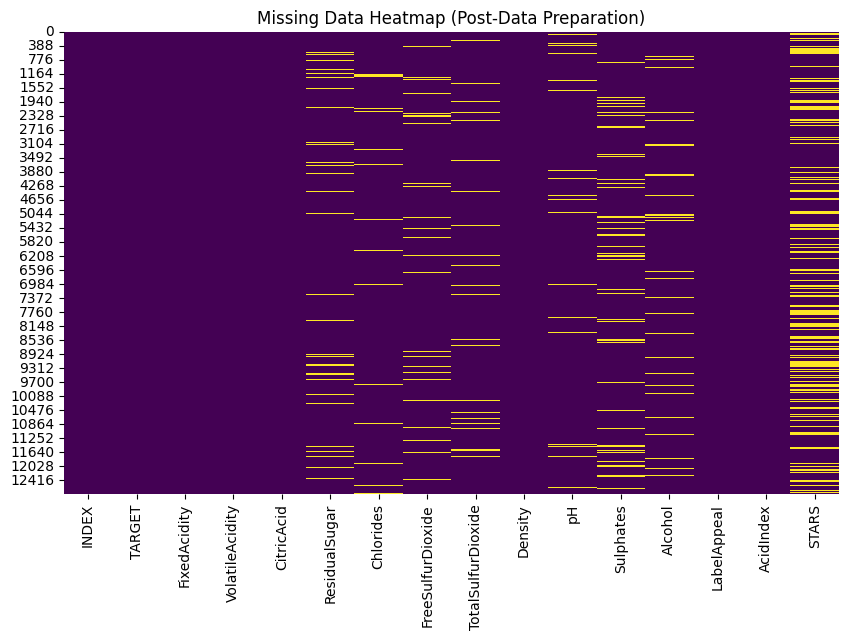

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap to visualize missing data
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap (Post-Data Preparation)")
plt.show()


In [40]:
# Check for duplicate rows
duplicates = data.duplicated().sum()

# Display number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


### Summary Statistics
Let’s look at some basic summary statistics of the dataset to ensure the data looks reasonable:

In [41]:
# Get summary statistics for the dataset
summary_statistics = data.describe()

# Display summary statistics
print(summary_statistics)


              INDEX        TARGET  FixedAcidity  VolatileAcidity  \
count  12795.000000  12795.000000  12795.000000     12795.000000   
mean    8069.980305      3.029074      7.075717         0.324104   
std     4656.905107      1.926368      6.317643         0.784014   
min        1.000000      0.000000    -18.100000        -2.790000   
25%     4037.500000      2.000000      5.200000         0.130000   
50%     8110.000000      3.000000      6.900000         0.280000   
75%    12106.500000      4.000000      9.500000         0.640000   
max    16129.000000      8.000000     34.400000         3.680000   

         CitricAcid  ResidualSugar     Chlorides  FreeSulfurDioxide  \
count  12795.000000   12179.000000  12157.000000       12148.000000   
mean       0.308413       5.418733      0.054822          30.845571   
std        0.862080      33.749379      0.318467         148.714558   
min       -3.240000    -127.800000     -1.171000        -555.000000   
25%        0.030000      -2.0000

### Visualizing the Distribution of Key Variables
We can also visualize the distribution of key variables that were adjusted during data preparation, such as ResidualSugar, Chlorides, and Alcohol:

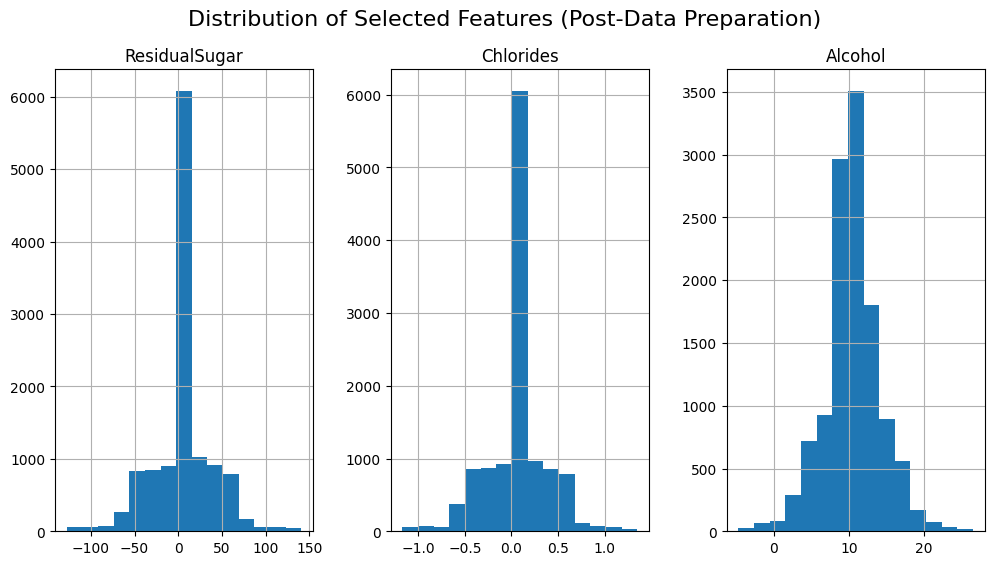

In [42]:
# Plot histograms for key variables
data[['ResidualSugar', 'Chlorides', 'Alcohol']].hist(bins=15, figsize=(12, 6), layout=(1, 3))

# Add titles
plt.suptitle('Distribution of Selected Features (Post-Data Preparation)', fontsize=16)
plt.show()


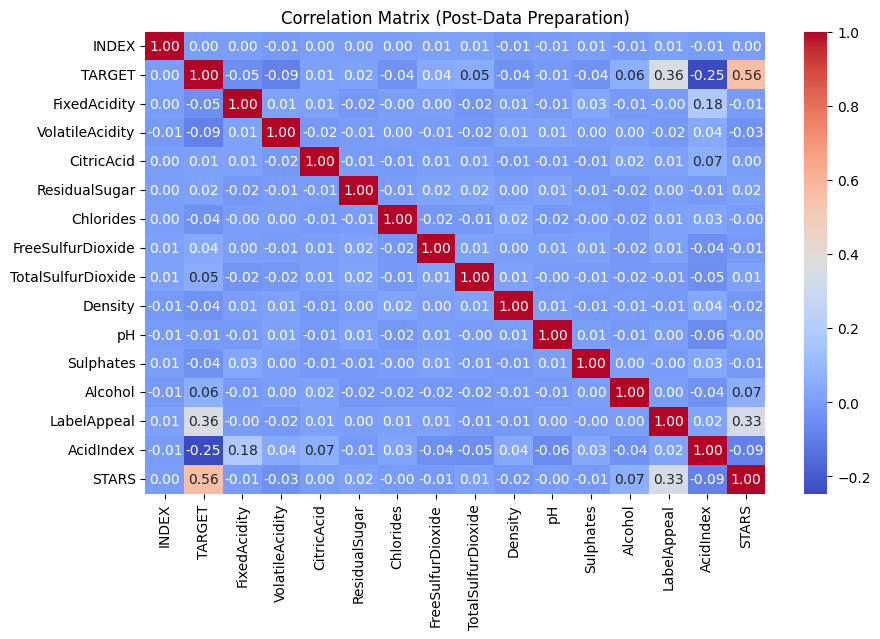

In [44]:
# Plot a correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix (Post-Data Preparation)')
plt.show()



In this part, we reviewed the dataset after completing the data preparation steps. We checked for missing values, duplicates, and ensured that the features were scaled appropriately. By re-running our exploratory analysis, we confirmed that the necessary adjustments were made to improve the quality of the data. This helps ensure that the dataset is ready for further analysis or modeling.


### Conclusion

We went over how to prepare and clean the dataset for additional analysis in this notebook. In order to find problems like missing values, duplicates, and scaling inconsistencies, we first performed exploratory data analysis (EDA). We double-checked the data after fixing these issues to be sure all the changes had taken effect.

We have made the dataset cleaner and more dependable by handling missing data, eliminating duplicates, and scaling the features. It is now prepared for any upcoming modeling or analytic processes. Since it creates the basis for more precise and significant insights, proper data preparation is essential.

All things considered, data preparation is crucial to guaranteeing that the conclusions drawn from our research are reliable and practical.